<a href="https://colab.research.google.com/github/parvezpappu/plant-leaf-disease-detection/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Visualisation

## Data Exploration

In [ ]:
# Checking if there are any null values in the dataset
dataset.isnull().any()

image_id             False
healthy              False
multiple_diseases    False
rust                 False
scab                 False
dtype: bool

In [ ]:
# Checking the column data type
dataset.dtypes

image_id             object
healthy               int64
multiple_diseases     int64
rust                  int64
scab                  int64
dtype: object

In [ ]:
# Adding .jpg extension to every image_id
dataset['image_id'] = dataset['image_id']+'.jpg'

In [ ]:
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0.jpg        0                  0     0     1
1        Train_1.jpg        0                  1     0     0
2        Train_2.jpg        1                  0     0     0
3        Train_3.jpg        0                  0     1     0
4        Train_4.jpg        1                  0     0     0
...              ...      ...                ...   ...   ...
1816  Train_1816.jpg        0                  0     0     1
1817  Train_1817.jpg        1                  0     0     0
1818  Train_1818.jpg        1                  0     0     0
1819  Train_1819.jpg        0                  0     1     0
1820  Train_1820.jpg        0                  0     0     1

[1821 rows x 5 columns]

## Data Visualisation

## Classes Distribution

Text(0.5, 1.0, 'Healthy Classes')

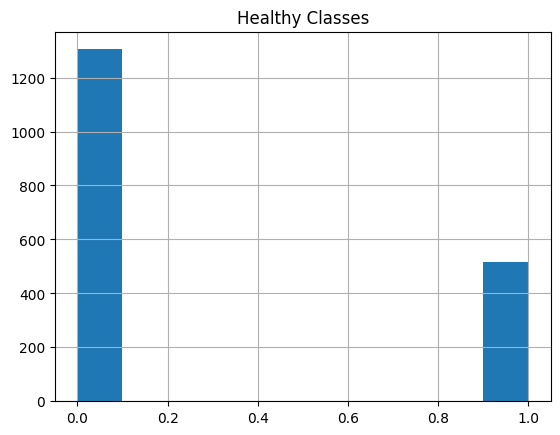

In [ ]:
dataset.healthy.hist()
plt.title('Healthy Classes')

Text(0.5, 1.0, 'Multiple Diseases Classes')

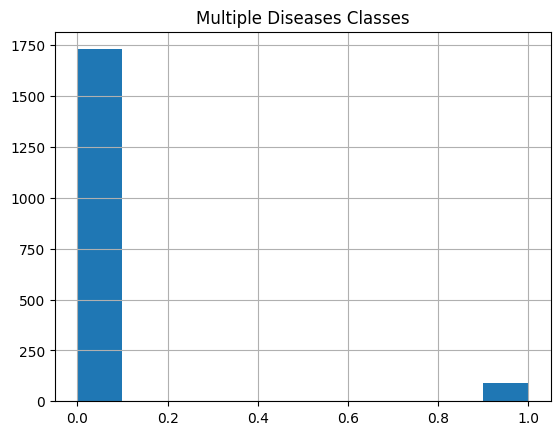

In [ ]:
dataset.multiple_diseases.hist()
plt.title('Multiple Diseases Classes')

Text(0.5, 1.0, 'Rust Classes')

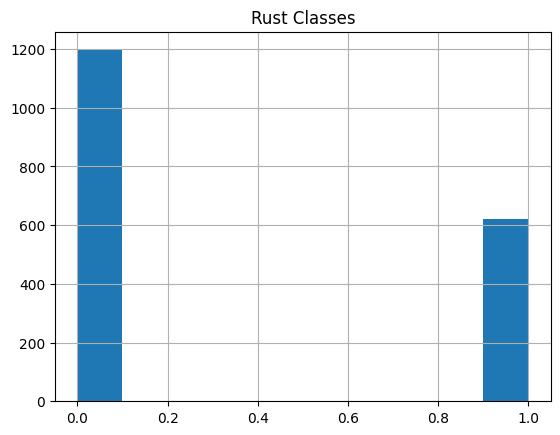

In [ ]:
dataset.rust.hist()
plt.title('Rust Classes')

Text(0.5, 1.0, 'Scab Classes')

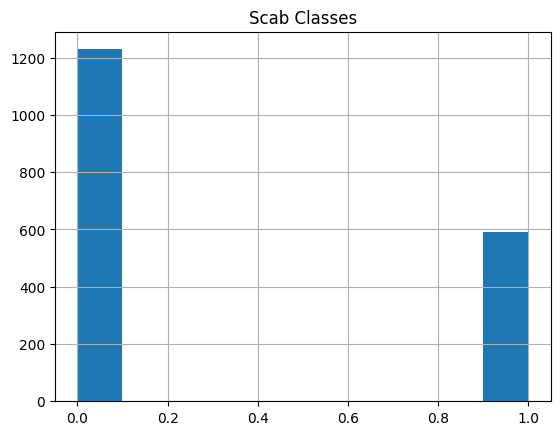

In [ ]:
dataset.scab.hist()
plt.title('Scab Classes')

## Class Image Visualisation

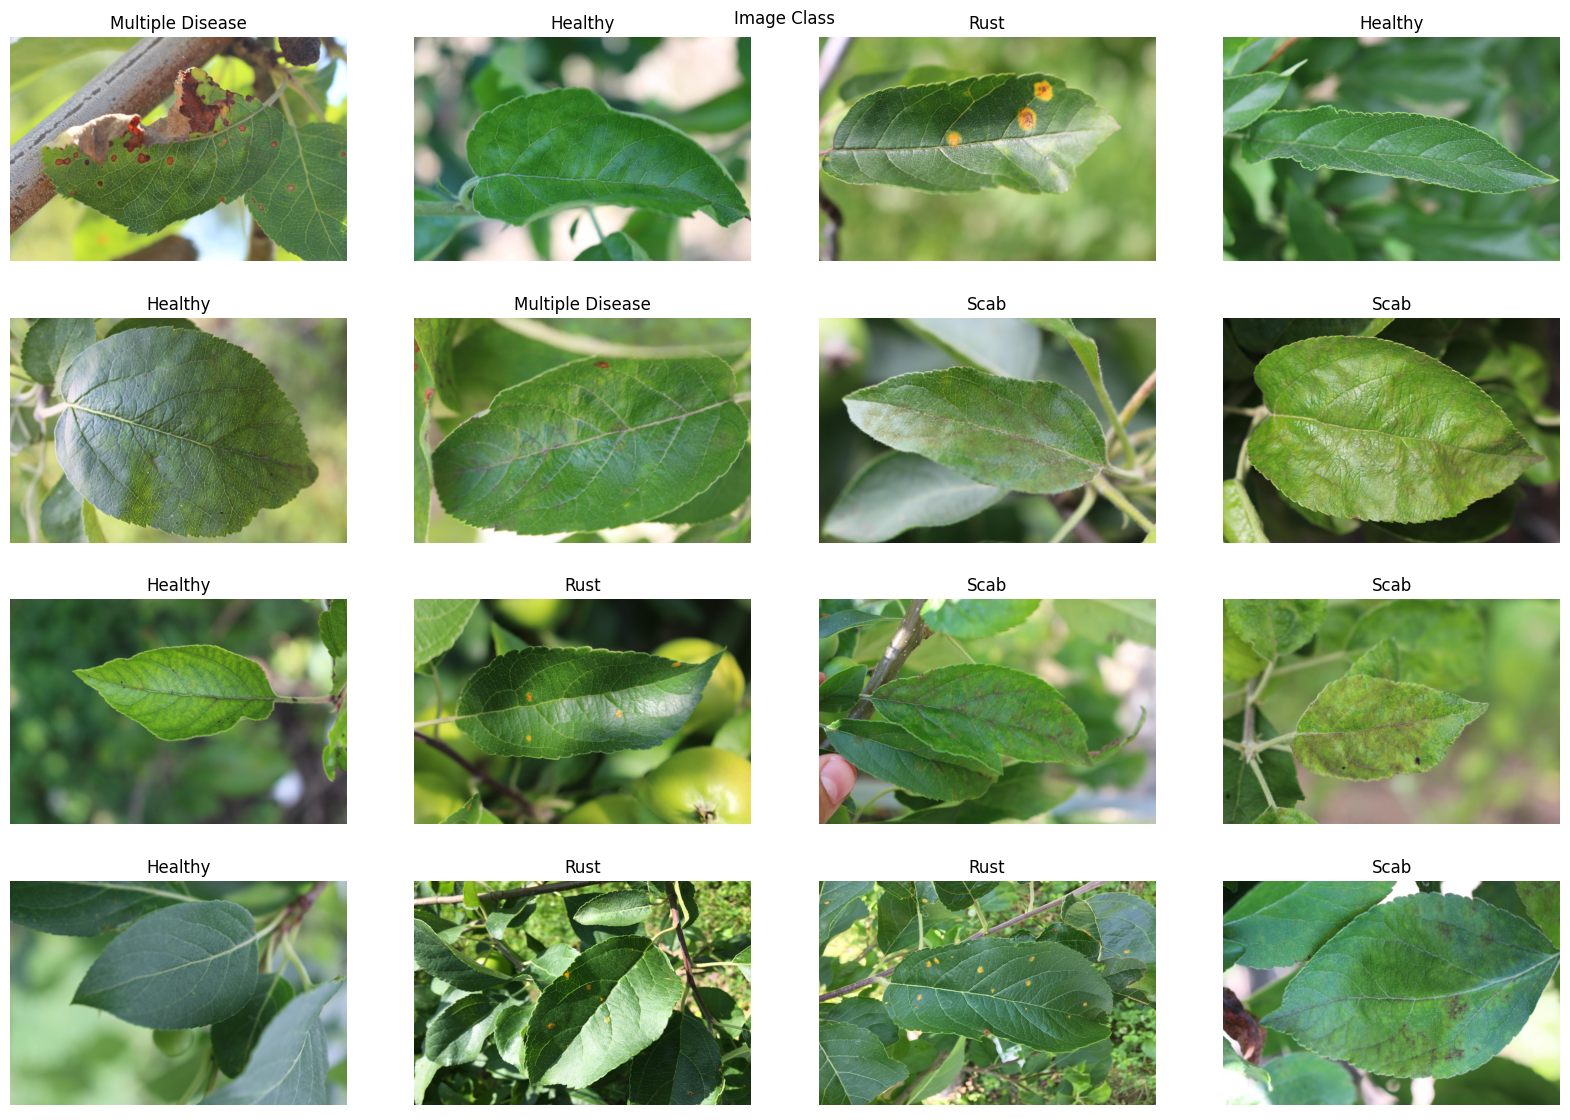

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Image Segmentation

Multiple Histogram for different pixles intensity values

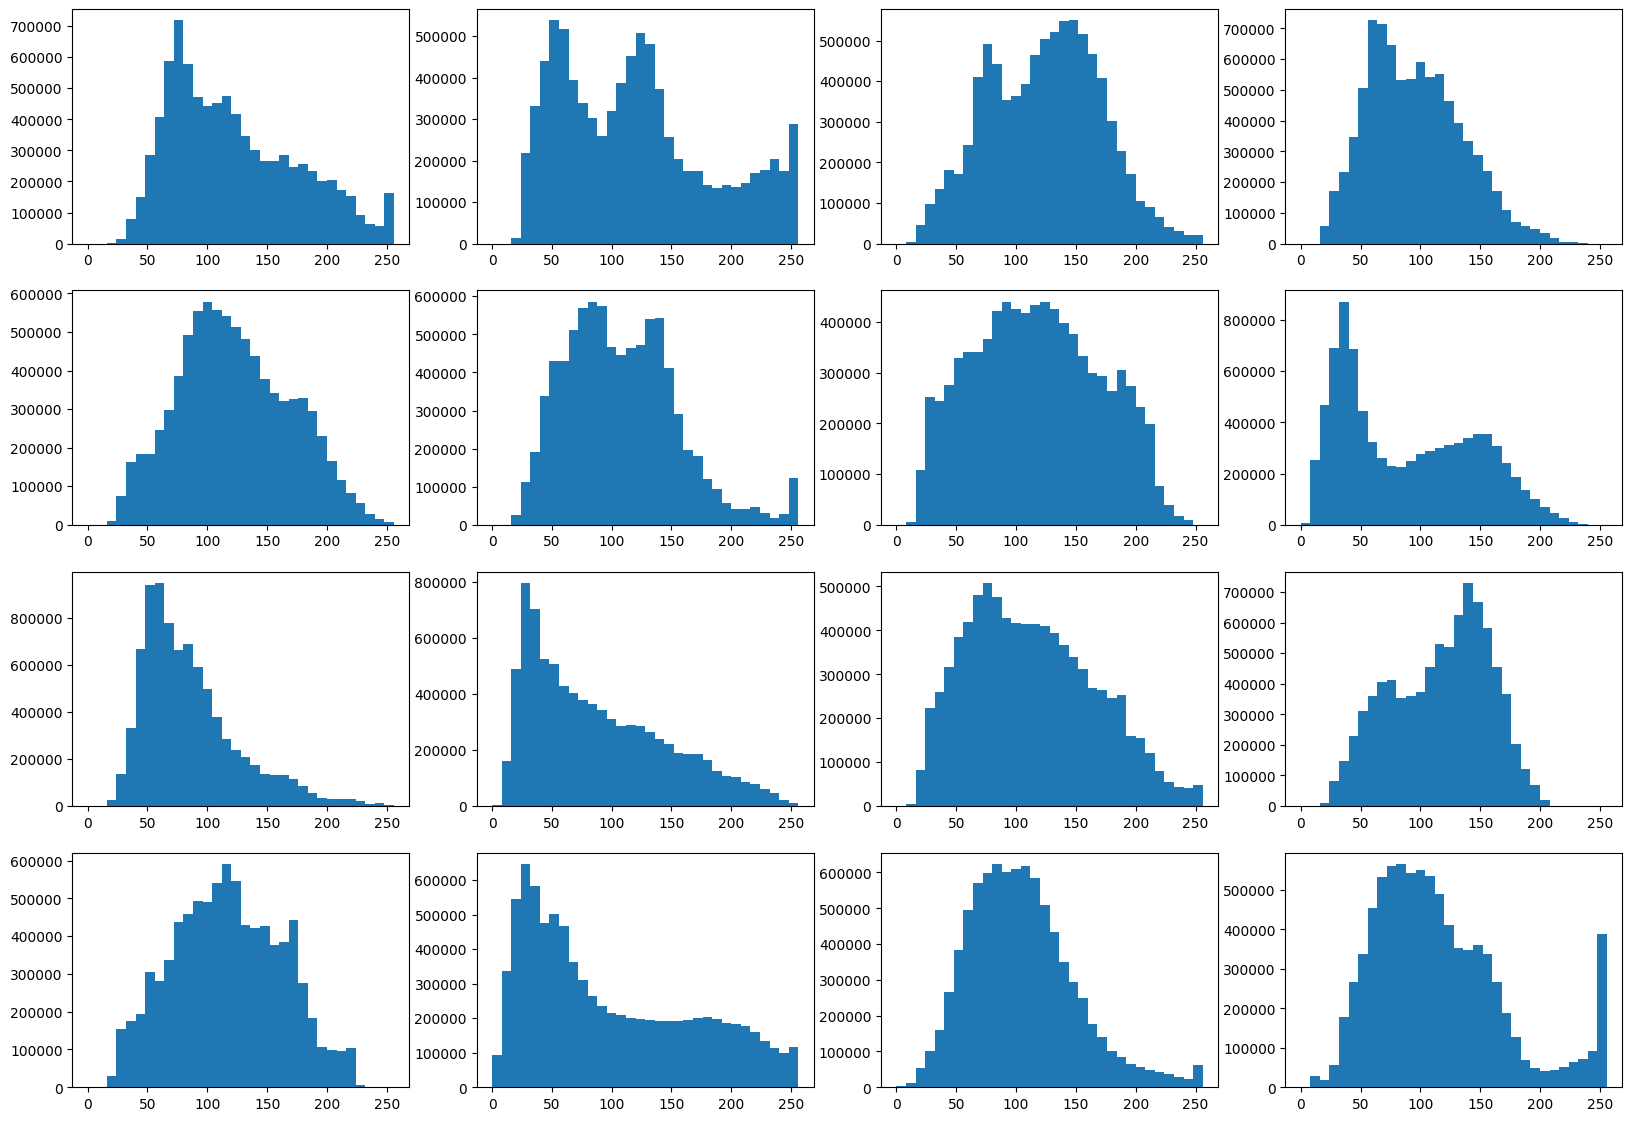

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

In [ ]:
img.shape

(1365, 2048, 3)

# Making Training Data

## Reading data from Keras Generators

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [ ]:
X_train, X_valid = train_test_split(dataset, test_size=0.05, shuffle=False)

## Making a Tensorflow Dataset

In [ ]:
BATCH_SIZE = 8

train_generator = datagen.flow_from_dataframe(dataset,
                    directory='/content/drive/MyDrive/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory='/content/drive/MyDrive/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

Found 1821 validated image filenames.
Found 92 validated image filenames.


## Generator Images Visualisations

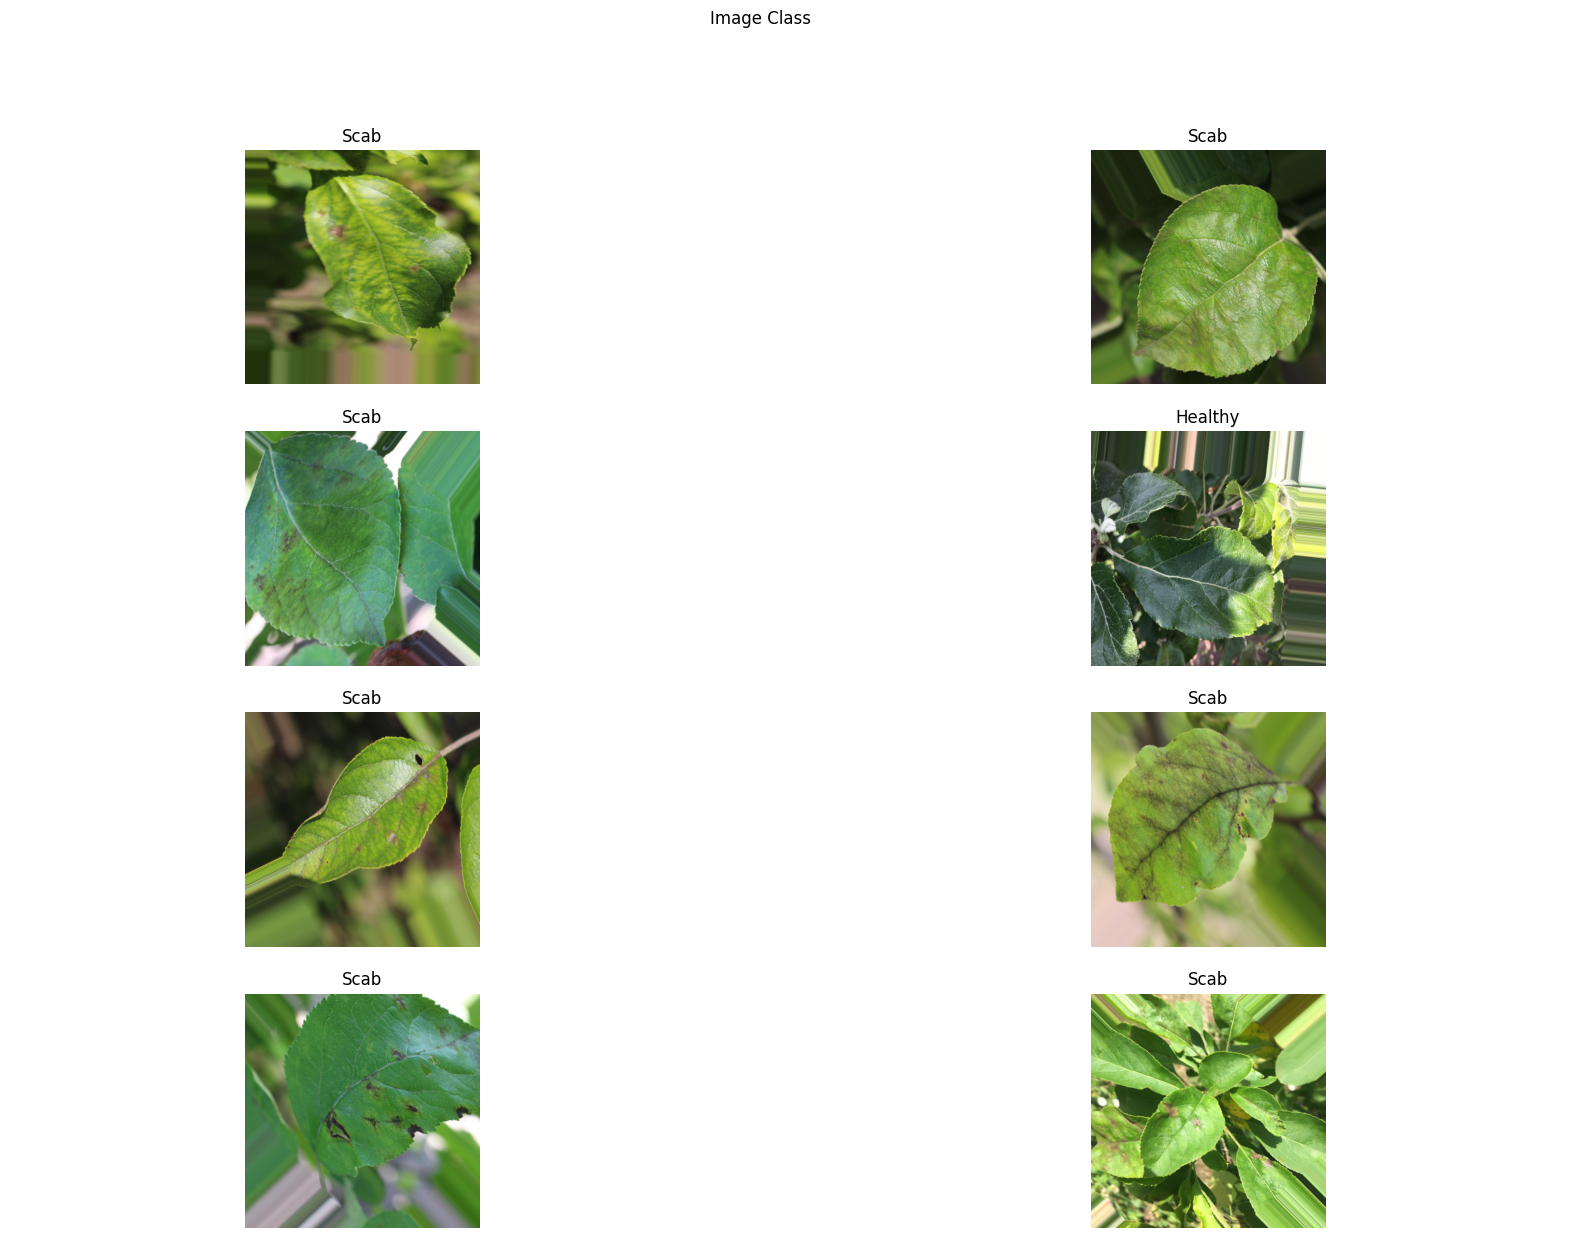

In [ ]:
w = 10
h = 10
fig = plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.suptitle('Image Class')   # use suptitle for overall title
plt.axis('off')

for i in range(1, columns * rows + 1):   # loop for 8 images
    img_batch, label_batch = next(train_generator)   # FIXED

    ax = fig.add_subplot(rows, columns, i)

    if label_batch[0][0] == 1:
        ax.set_title('Healthy')
    elif label_batch[0][1] == 1:
        ax.set_title('Multiple Disease')
    elif label_batch[0][2] == 1:
        ax.set_title('Rust')
    else:
        ax.set_title('Scab')

    ax.imshow(img_batch[0])   # show the first image from the batch
    ax.axis('off')

plt.show()


# Making The Models

## Xception Model

In [ ]:

xception_model = tf.keras.models.Sequential([
  tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 16, 16, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 20,815,148 (79.40 MB)

 Non-trainable params: 54,528 (213.00 KB)

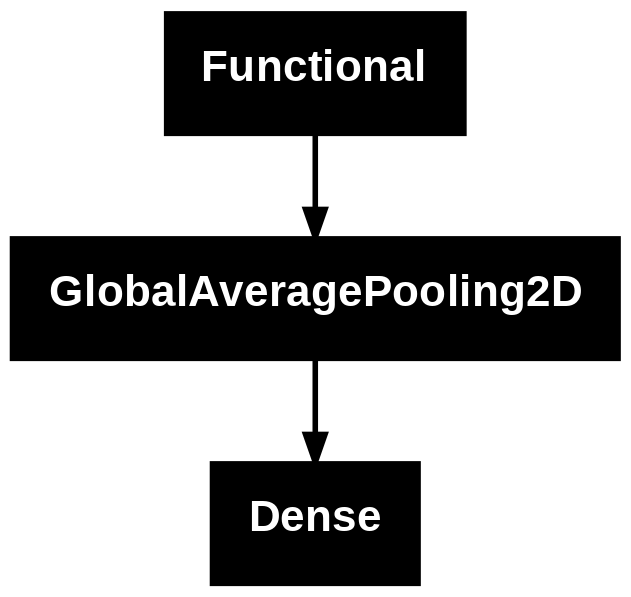

In [ ]:
tf.keras.utils.plot_model(xception_model, to_file='xception_model.png')

## DenseNet121

In [ ]:

densenet_model = tf.keras.models.Sequential([
    tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet',input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 16, 16, 1024)   │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 6,957,956 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

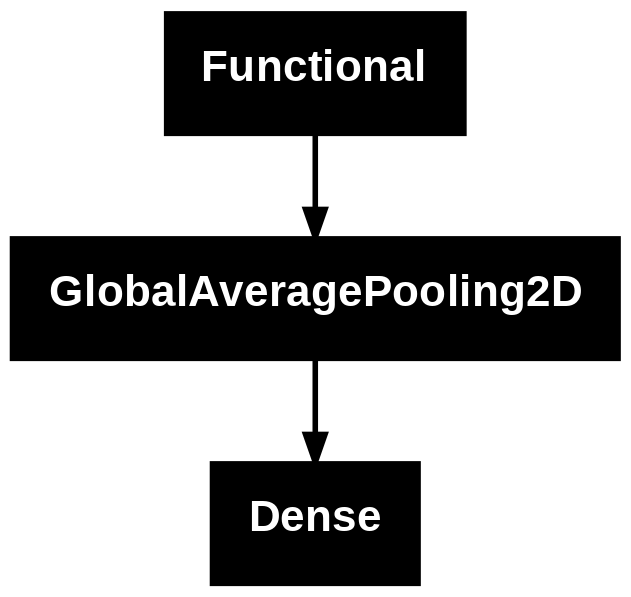

In [ ]:
tf.keras.utils.plot_model(densenet_model, to_file='densenet_model.png')

# Ensembling the Models

In [ ]:
inputs = tf.keras.Input(shape=(512, 512, 3))

xception_output = xception_model(inputs)
densenet_output = densenet_model(inputs)

outputs = tf.keras.layers.average([densenet_output, xception_output])


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 4)         │  7,041,604 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 4)         │ 20,869,676 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average (Average)   │ (None, 4)         │          0 │ sequential_1[0][… │
│                     │                   │            │ sequential[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,911,280 (106.47 MB)

 Trainable params: 27,773,104 (105.95 MB)

 Non-trainable params: 138,176 (539.75 KB)

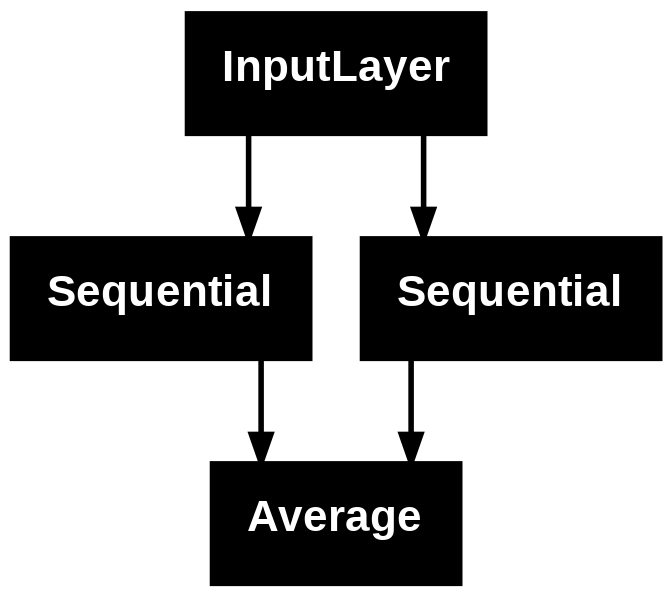

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png')

## Setting the hyperparameters & Callbacks

Learning rate schedule: 1e-05 to 6.4e-05 to 6.4e-05


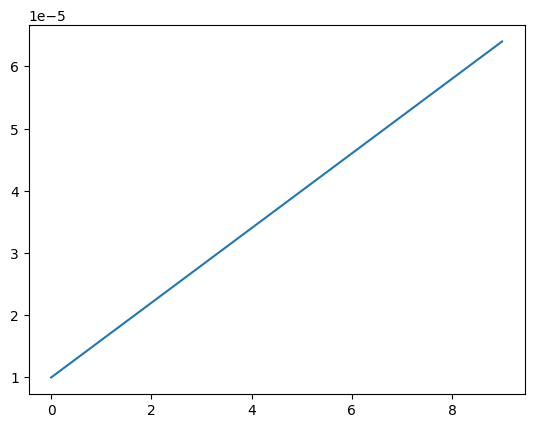

In [ ]:
LR_START = 0.00001
LR_MAX = 0.0001
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 15
LR_SUSTAIN_EPOCHS = 3
LR_EXP_DECAY = .8
EPOCHS = 10

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=2, save_best_only=True)

# Tensordash is used for getting live model training status, like accuracy or loss, in your phone, sure to checkout here: https://github.com/CleanPegasus/TensorDash
#histories = Tensordash(
   # email = secret_value_0,
   # password = secret_value_1,
#    ModelName = "Plant Disease Model")

# Training the Model

In [ ]:
model_history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[model_checkpoint, lr_callback]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4372 - loss: 1.2098
Epoch 1: val_accuracy improved from -inf to 0.86957, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 1549s 6s/step - accuracy: 0.4379 - loss: 1.2090 - val_accuracy: 0.8696 - val_loss: 0.6304 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.6000000000000003e-05.
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.8365 - loss: 0.5760
Epoch 2: val_accuracy improved from 0.86957 to 0.93478, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 220s 960ms/step - accuracy: 0.8366 - loss: 0.5756 - val_accuracy: 0.9348 - val_loss: 0.2185 - learning_rate: 1.6000e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.2e-05.
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.9040 - loss: 0.3122
Epoch 3: val_accuracy did not improve from 0.93478
228/228 ━━━━━━━━━━━━━━━━━━━━ 214s 935ms/step - accuracy: 0.9040 - loss: 0.3122 - val_accuracy: 0.9348 - val_loss: 0.1423 - learning_rate: 2.2000e-05

Epoch 4: LearningRateScheduler setting learning rate to 2.8000000000000003e-05.
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.9155 - loss: 0.2357
Epoch 4: val_accuracy improved from 0.93478 to 0.95652, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 218s 954ms/step - accuracy: 0.9156 - loss: 0.2357 - val_accuracy: 0.9565 - val_loss: 0.1028 - learning_rate: 2.8000e-05

Epoch 5: LearningRateScheduler setting learning rate to 3.4e-05.
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.9465 - loss: 0.1727
Epoch 5: val_accuracy did not improve from 0.95652
228/228 ━━━━━━━━━━━━━━━━━━━━ 217s 942ms/step - accuracy: 0.9465 - loss: 0.1727 - val_accuracy: 0.9348 - val_loss: 0.1227 - learning_rate: 3.4000e-05

Epoch 6: LearningRateScheduler setting learning rate to 4e-05.
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.9605 - loss: 0.1370
Epoch 6: val_accuracy improved from 0.95652 to 0.97826, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 219s 961ms/step - accuracy: 0.9605 - loss: 0.1370 - val_accuracy: 0.9783 - val_loss: 0.0558 - learning_rate: 4.0000e-05

Epoch 7: LearningRateScheduler setting learning rate to 4.6e-05.
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.9586 - loss: 0.1117
Epoch 7: val_accuracy did not improve from 0.97826
228/228 ━━━━━━━━━━━━━━━━━━━━ 214s 936ms/step - accuracy: 0.9586 - loss: 0.1117 - val_accuracy: 0.9783 - val_loss: 0.0474 - learning_rate: 4.6000e-05

Epoch 8: LearningRateScheduler setting learning rate to 5.2000000000000004e-05.
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.9721 - loss: 0.0906
Epoch 8: val_accuracy did not improve from 0.97826
228/228 ━━━━━━━━━━━━━━━━━━━━ 214s 937ms/step - accuracy: 0.9721 - loss: 0.0906 - val_accuracy: 0.9674 - val_loss: 0.1009 - learning_rate: 5.2000e-05

Epoch 9: LearningRateScheduler setting learning rate to 5.8e-05.
Epoch 9/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accura

228/228 ━━━━━━━━━━━━━━━━━━━━ 221s 969ms/step - accuracy: 0.9746 - loss: 0.0839 - val_accuracy: 0.9891 - val_loss: 0.0343 - learning_rate: 5.8000e-05

Epoch 10: LearningRateScheduler setting learning rate to 6.4e-05.
Epoch 10/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.9759 - loss: 0.0703
Epoch 10: val_accuracy did not improve from 0.98913
228/228 ━━━━━━━━━━━━━━━━━━━━ 216s 944ms/step - accuracy: 0.9759 - loss: 0.0703 - val_accuracy: 0.9783 - val_loss: 0.0372 - learning_rate: 6.4000e-05


### Saving History

In [ ]:
# Saving model history
pd.DataFrame(model_history.history).to_csv('ModelHistory.csv')

### Model History Visualisation

Text(0.5, 1.0, 'accuracy Plot')

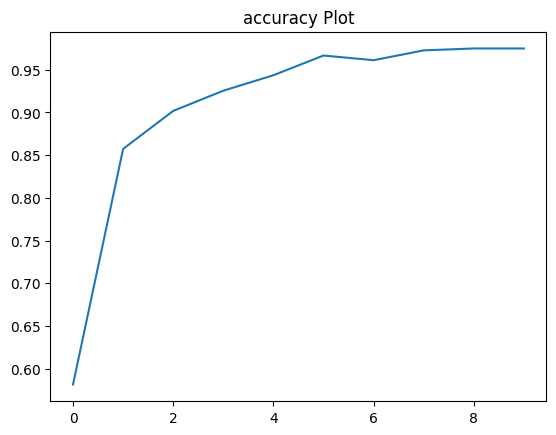

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['accuracy'])
plt.title("accuracy Plot")

Text(0.5, 1.0, 'Loss Plot')

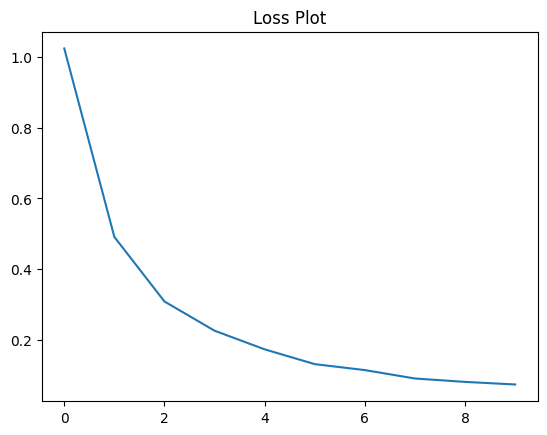

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['loss'])
plt.title("Loss Plot")

Text(0.5, 1.0, 'Validation Accuracy Plot')

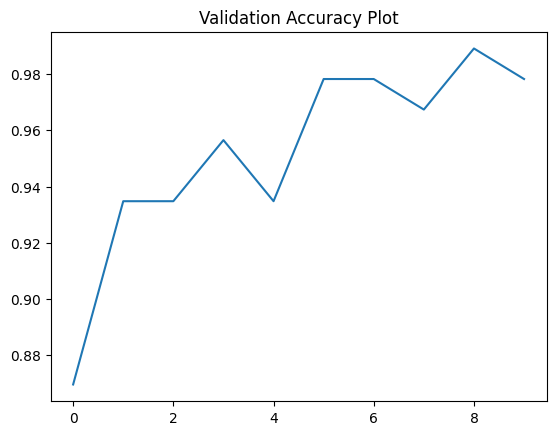

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['val_accuracy'])
plt.title("Validation Accuracy Plot")

Text(0.5, 1.0, 'Validation Accuracy Plot')

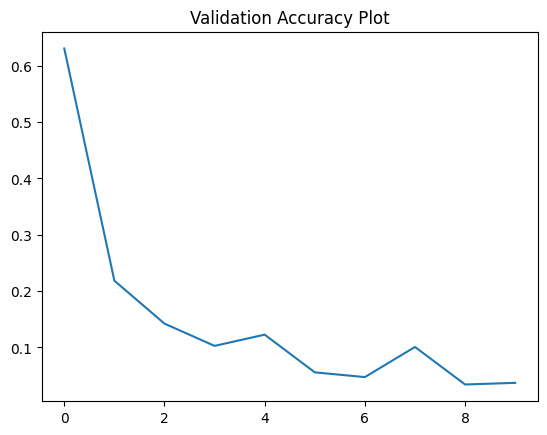

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['val_loss'])
plt.title("Validation Accuracy Plot")

# Predicting Classes

In [ ]:
# Reading testing and submission data
test_dataset = pd.read_csv('/content/drive/MyDrive/plant/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/plant/sample_submission.csv')
test_dataset

image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]

In [ ]:
# Adding .jpg extension to image_id
test_dataset['image_id'] = test_dataset['image_id']+'.jpg'

In [ ]:
test_gen = datagen.flow_from_dataframe(test_dataset,
                    directory='/content/drive/MyDrive/plant/images/',
                    x_col='image_id',
                    target_size=(512, 512),
                    class_mode=None,
                    shuffle=False,
                    batch_size=8)

Found 1821 validated image filenames.


In [ ]:
# if you want to cover all samples in order
test_gen.reset()                           # important when predicting with generators
pred_probs = model.predict(test_gen, verbose=0)  # Keras handles generators here


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [ ]:
test_gen.reset()  # keep order aligned with filenames
predictions = model.predict(test_gen, verbose=0)   # create it

# now this works:
submission['healthy']          = predictions[:, 0]
submission['multiple_diseases'] = predictions[:, 1]
submission['rust']             = predictions[:, 2]
submission['scab']             = predictions[:, 3]


In [ ]:
submission

image_id       healthy  multiple_diseases      rust      scab
0        Test_0  1.747431e-05           0.000937  0.999037  0.000008
1        Test_1  1.011742e-06           0.003796  0.996197  0.000006
2        Test_2  4.905998e-05           0.000153  0.000094  0.999704
3        Test_3  9.995691e-01           0.000005  0.000415  0.000011
4        Test_4  9.269447e-06           0.000430  0.999513  0.000048
...         ...           ...                ...       ...       ...
1816  Test_1816  9.709736e-07           0.002352  0.997644  0.000003
1817  Test_1817  5.772964e-05           0.265263  0.000195  0.734484
1818  Test_1818  7.798883e-06           0.001514  0.998475  0.000003
1819  Test_1819  9.998745e-01           0.000006  0.000024  0.000096
1820  Test_1820  3.487665e-05           0.000868  0.000072  0.999025

[1821 rows x 5 columns]

In [ ]:
submission.to_csv('submission.csv', index=False)